![hr.jpg](attachment:hr.jpg)

# Answer these questions using the libraries Pandas and Numpy.

1-How many rows and columns are there in the dataset?

2-What are the unique values in the 'department' column?

3-How many unique regions are covered in the dataset?

4-What are the different levels of education among the employees?

5-How many male and female employees are there in the dataset?

6-What are the different recruitment channels used by the company?

7-What is the maximum number of trainings attended by an employee?

8-What is the average age of employees in the dataset?

9-What is the maximum length of service among the employees?

10-What percentage of employees in the dataset were actually promoted?

11-What is the average age of promoted employees compared to non-promoted ones?

12-How does the average training score differ between promoted and non-promoted employees?

13-What is the average length of service for promoted employees?

14-What is the proportion of employees who have won awards among promoted employees?

15-Is there a correlation between KPIs met >80% and promotion?

16-What is the correlation between the number of trainings attended and promotion?

17-How does the length of service correlate with the average training score?

18-Is there any correlation between age and the number of trainings attended?

19-How can you group the data by department and calculate the average age for each department?

20-What is the total number of trainings attended by employees in each region?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read csv file
df = pd.read_csv("data.csv")

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


#1-How many rows and columns are there in the dataset?

In [4]:
df.shape
# 54808 row , 14 column 

(54808, 14)

#What are the unique values in the 'department' column?

In [5]:
df['department'].unique()
# ans : 'Sales & Marketing', 'Operations', 'Technology', 'Analytics',
      # 'R&D', 'Procurement', 'Finance', 'HR', 'Legal'

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [6]:
df['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

#3-How many unique regions are covered in the dataset?

In [7]:
 df['region'].nunique()
# ans : 34

34

#What are the different levels of education among the employees?

In [8]:
df['education'].unique()
# ans "Master's & above", "Bachelor's", 'Below Secondary'

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

#5-How many male and female employees are there in the dataset?

In [9]:
df['gender'].value_counts()
#ans 38496 male    16312 female

gender
m    38496
f    16312
Name: count, dtype: int64

#6-What are the different recruitment channels used by the company?

In [10]:
df['recruitment_channel'].unique()
# ans 'sourcing', 'other', 'referred'

array(['sourcing', 'other', 'referred'], dtype=object)

7-What is the maximum number of trainings attended by an employee?

In [11]:
df['no_of_trainings'].max()
#ans 10

10

In [12]:
#find the employee has  the maximum number of trainings attended by an employee?
df.sort_values(by='no_of_trainings', ascending=False).head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
34496,49408,Procurement,region_2,Bachelor's,m,other,10,60,3.0,3,0,0,69,0


find the employee has  the maximum number of trainings attended by an employee?

In [13]:
round(df['age'].mean())

35

#9-What is the maximum length of service among the employees?

In [14]:
df['length_of_service'].max()
#ans 37

37

In [15]:
df.sort_values(by='length_of_service', ascending=False).head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31071,51576,Sales & Marketing,region_2,Bachelor's,m,sourcing,2,60,5.0,37,0,0,48,0


10-What percentage of employees in the dataset were actually promoted?

In [16]:
total_employees = df['employee_id'].count()
promoted_employees = df[df['is_promoted'] == 1]['employee_id'].count()

percentage_promoted = (promoted_employees * 100.0) / total_employees
print (percentage_promoted) #ans = 8.52
print(round(percentage_promoted))  #ans = 9

8.517004816815064
9


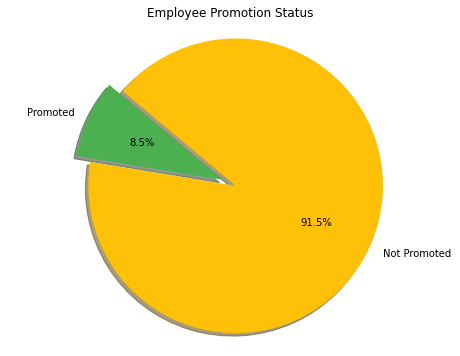

In [17]:
# Data for the pie chart
total_employees = df['employee_id'].count()
promoted_employees = df[df['is_promoted'] == 1]['employee_id'].count()
percentage_promoted = (promoted_employees * 100.0) / total_employees
not_promoted_percentage = 100-percentage_promoted
labels = ['Promoted', 'Not Promoted']
sizes = [percentage_promoted, not_promoted_percentage]
colors = ['#4CAF50', '#FFC107']  # Colors for the sections
explode = (0.1, 0)  # Explode the first slice (Promoted)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')  

# Title
plt.title('Employee Promotion Status')

# Show the chart
plt.show()


11-What is the average age of promoted employees compared to non-promoted ones?

In [18]:
print(round(df[df['is_promoted'] == 1]['age'].mean(), 2)) #promoted   #ans 34.37
print(round(df[df['is_promoted'] == 0]['age'].mean(), 2))  #non_promoted  #ans 34.84

34.37
34.84


12-How does the average training score differ between promoted and non-promoted employees?

In [19]:
 print(df[df['is_promoted'] == 1]['avg_training_score'].mean())  #ans 71.32519280205655 for promoted
 print(df[df['is_promoted'] == 0]['avg_training_score'].mean())  #ans 62.64768647786199 for non

71.32519280205655
62.64768647786199


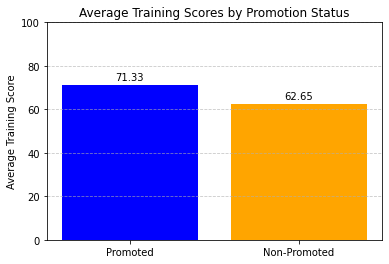

In [20]:
avg_training_score_promoted = df[df['is_promoted'] == 1]['avg_training_score'].mean()
avg_training_score_non_promoted = df[df['is_promoted'] == 0]['avg_training_score'].mean()

# Data for plotting
labels = ['Promoted', 'Non-Promoted']
scores = [avg_training_score_promoted, avg_training_score_non_promoted]

# Create a bar chart
plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylabel('Average Training Score')
plt.title('Average Training Scores by Promotion Status')
plt.ylim(0, 100)  # Set y-axis limit for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add grid lines for clarity
for i, score in enumerate(scores):
    plt.text(i, score + 1, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

#13-What is the average length of service for promoted employees?

In [21]:
 round(df[df['is_promoted'] == 1]['length_of_service'].mean(), 2) #ans 5.72 

5.72

14-What is the proportion of employees who have won awards among promoted employees?

In [22]:
 df[(df['awards_won?'] == 1) & (df['is_promoted'] == 1)]['awards_won?'].count()

559

15-Is there a correlation between KPIs met >80% and promotion?

In [23]:
df['KPIs_met >80%'].corr(df['is_promoted'])

0.22158153967700986

16-What is the correlation between the number of trainings attended and promotion?

In [24]:
df['no_of_trainings'].corr(df['is_promoted'])

-0.0248959176824125

17-How does the length of service correlate with the average training score?

In [25]:
df['length_of_service'].corr(df['avg_training_score'])

-0.03812215595838484

18-Is there any correlation between age and the number of trainings attended?

In [26]:
df['age'].corr(df['no_of_trainings'])

-0.0812778851589133

19-How can you group the data by department and calculate the average age for each department?

In [27]:
df.groupby('department')['age'].mean().round()


department
Analytics            32.0
Finance              32.0
HR                   34.0
Legal                34.0
Operations           36.0
Procurement          36.0
R&D                  33.0
Sales & Marketing    35.0
Technology           35.0
Name: age, dtype: float64

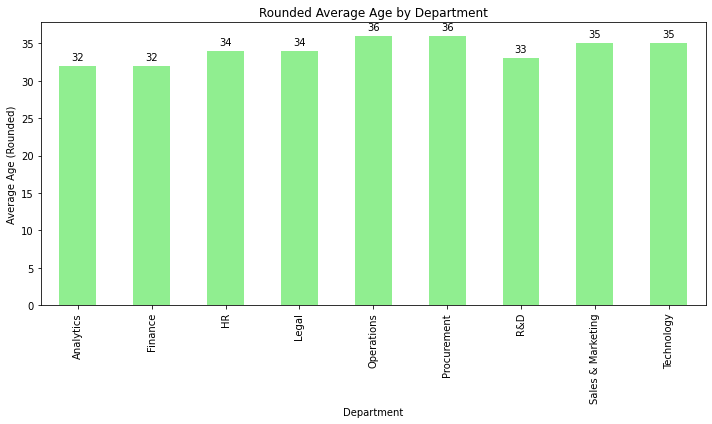

In [30]:
# Calculate the rounded average age for each department
avg_age_by_department = df.groupby('department')['age'].mean().round()

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
avg_age_by_department.plot(kind='bar', color='lightgreen')

# Adding labels and title
plt.xlabel('Department')
plt.ylabel('Average Age (Rounded)')
plt.title('Rounded Average Age by Department')

# Annotate the bars with the rounded average age
for index, value in enumerate(avg_age_by_department):
    plt.text(index, value + 0.5, str(int(value)), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

20-What is the total number of trainings attended by employees in each region?

In [28]:
df.groupby('region')['no_of_trainings'].count()

region
region_1       610
region_10      648
region_11     1315
region_12      500
region_13     2648
region_14      827
region_15     2808
region_16     1465
region_17      796
region_18       31
region_19      874
region_2     12343
region_20      850
region_21      411
region_22     6428
region_23     1175
region_24      508
region_25      819
region_26     2260
region_27     1659
region_28     1318
region_29      994
region_3       346
region_30      657
region_31     1935
region_32      945
region_33      269
region_34      292
region_4      1703
region_5       766
region_6       690
region_7      4843
region_8       655
region_9       420
Name: no_of_trainings, dtype: int64

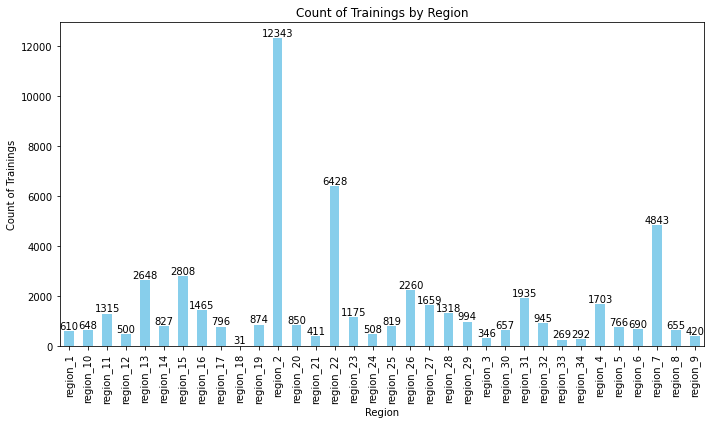

In [29]:
# Count the number of trainings for each region
training_count_by_region = df.groupby('region')['no_of_trainings'].count()

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
training_count_by_region.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Count of Trainings')
plt.title('Count of Trainings by Region')

# Annotate the bars with the counts
for index, value in enumerate(training_count_by_region):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
